In [2]:
import pandas as pd
import glob

# Example: load all CSV files from a folder
csv_files = glob.glob("/Users/nainaa/Downloads/CCI_Projects/Creative_Coding/censorship/csv_files/*.csv")
# Combine all into one DataFrame
dfs = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)


In [ ]:
import re
from wordcloud import WordCloud, STOPWORDS, get_single_color_func
import matplotlib.pyplot as plt

# Combine all text
text = ' '.join(df['text'].astype(str).tolist())
text = re.sub(r'[^A-Za-z\s]', '', text)
text = text.lower()

# Add custom stopwords
custom_stopwords = {
    "video", "youtube", "link", "watch", "comment", "subscribe", "channel",
    "href", "https", "www", "com", "you", "im", "yet", 
    "hrefhttpswwwyoutubecomwatchvmaeophxksampta", "thats", "use", "lot", "hes"
}
stopwords = STOPWORDS.union(custom_stopwords)

# Remove stopwords
text = ' '.join(word for word in text.split() if word not in stopwords)


In [4]:
class RedGradientColorFunc:
    def __call__(self, word, font_size, position, orientation, font_path, random_state):
        intensity = min(255, 50 + int(font_size * 2))  # Adjust if needed
        return f"rgb({intensity}, 0, 0)"


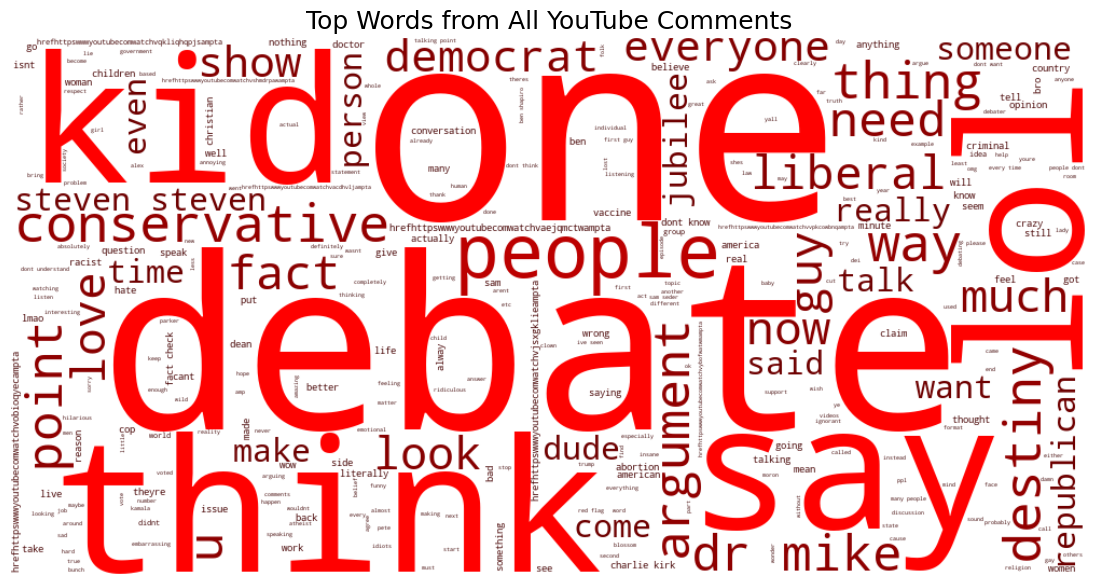

In [ ]:
wc = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    stopwords=stopwords,
    max_words=300
)

wc.generate(text)
wc.recolor(color_func=RedGradientColorFunc())

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words from All YouTube Comments", fontsize=18)
plt.show()


In [14]:
import re
from wordcloud import WordCloud, STOPWORDS, get_single_color_func
import matplotlib.pyplot as plt

# Combine all text
text = ' '.join(df['text'].astype(str).tolist())
text = re.sub(r'[^A-Za-z\s]', '', text)
text = text.lower()

# Add custom stopwords
custom_stopwords = {
    "video", "youtube", "link", "watch", "comment", "subscribe", "channel",
    "href", "https", "www", "com", "you", "im", "yet", 
    "hrefhttpswwwyoutubecomwatchvmaeophxksampta", "thats", "use", "lot", "hes", "lol", "n", "say", "much", "steven", "mike", "take", "really", "way", "anything", "someone", "even", "come", "destiny", "put", "talk", "one", "dude", "make", "look", "want", "thing", "go", "hrefhttpswwwyoutubecomwatchvaejqmctwampta", "hrefhttpswwwyoutubecomwatchvjsxgklieampta", "theyre", "bro", "nothing", "know", "lmao", "ben", "charlie", "charlie kirk", "isnt", "something", "cant", "dean", "said", "got", "u", "sam", "actually", "made", "things", "jubiolee", "back", "well", "saying", "said", "seem"
}
stopwords = STOPWORDS.union(custom_stopwords)

# Remove stopwords
text = ' '.join(word for word in text.split() if word not in stopwords)


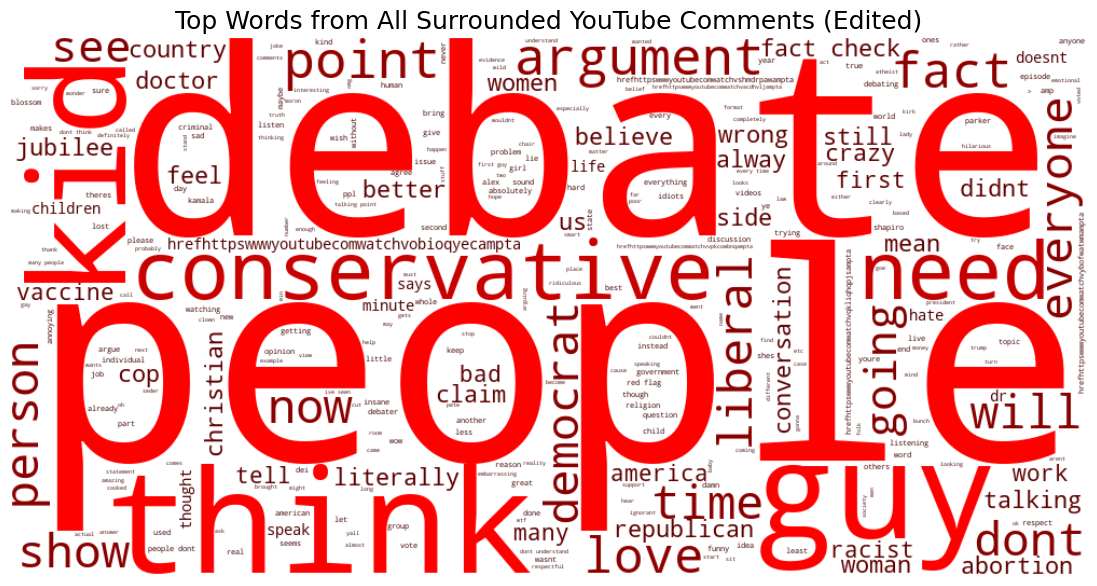

In [16]:
wc = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    stopwords=stopwords,
    max_words=300
)

wc.generate(text)
wc.recolor(color_func=RedGradientColorFunc())

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words from All Surrounded YouTube Comments (Edited)", fontsize=18)
plt.show()


In [19]:
from collections import Counter

word_list = text.split()
word_counts = Counter(word_list)

# Top 20 most frequent words
top_words = word_counts.most_common(100)
print(top_words)


[('people', 56234), ('guy', 23906), ('dont', 23171), ('debate', 17738), ('think', 12634), ('time', 12632), ('person', 11440), ('see', 10598), ('talking', 10195), ('fact', 9715), ('doesnt', 9400), ('will', 8835), ('love', 8778), ('point', 8712), ('need', 8433), ('let', 8418), ('vs', 7834), ('first', 7824), ('never', 7680), ('didnt', 7363), ('many', 7309), ('black', 7153), ('facts', 7053), ('every', 6938), ('jubilee', 6820), ('speak', 6485), ('going', 6373), ('everyone', 6297), ('argument', 6246), ('life', 6182), ('dr', 6128), ('woman', 6098), ('better', 5904), ('girl', 5742), ('racist', 5709), ('kid', 5500), ('conservatives', 5488), ('now', 5450), ('women', 5404), ('wrong', 5348), ('flags', 5344), ('bad', 5317), ('us', 5316), ('white', 5314), ('lady', 5190), ('believe', 5101), ('kids', 5008), ('understand', 4913), ('vote', 4912), ('great', 4832), ('points', 4765), ('conversation', 4739), ('feel', 4702), ('trying', 4701), ('always', 4684), ('youre', 4677), ('literally', 4656), ('still', 

In [20]:
pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).to_csv("word_frequencies.csv", index=False)


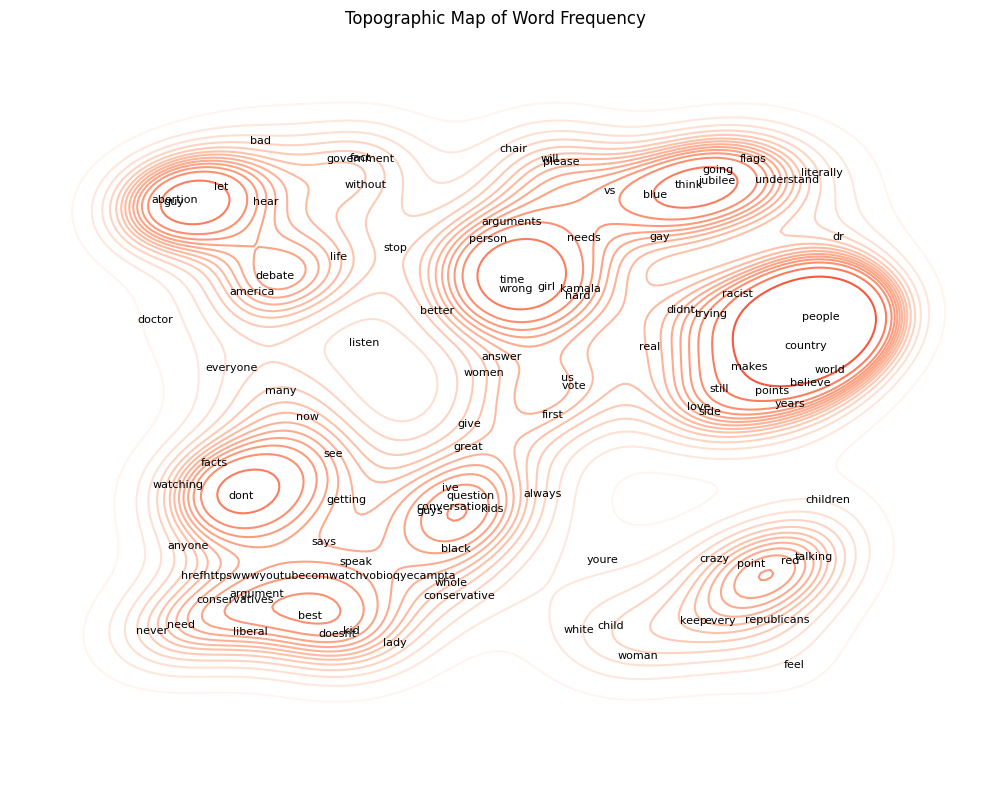

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load data
data = pd.read_csv("word_frequencies.csv")

# Pick top N words for clarity
top_n = data.sort_values(by='Count', ascending=False).head(100)

# Assign grid positions
top_n['x'] = np.random.uniform(0, 10, size=len(top_n))
top_n['y'] = np.random.uniform(0, 10, size=len(top_n))

# Create contour-like plot using seaborn KDE
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=top_n['x'],
    y=top_n['y'],
    weights=top_n['Count'],
    cmap="Reds",
    fill=False,
    bw_adjust=0.5,
    levels=15,
    thresh=0.05
)

# Annotate words
for i, row in top_n.iterrows():
    plt.text(row['x'], row['y'], row['Word'], fontsize=8, ha='center')

plt.title("Topographic Map of Word Frequency")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
data = pd.read_csv("word_frequencies.csv")

exclude_words =     {"video", "youtube", "link", "watch", "comment", "subscribe", "channel",
    "href", "https", "www", "com", "you", "im", "yet", 
    "hrefhttpswwwyoutubecomwatchvmaeophxksampta", "thats", "use", "lot", "hes", "lol", "n", "say", "much", "steven", "mike", "take", "really", "way", "anything", "someone", "even", "come", "destiny", "put", "talk", "one", "dude", "make", "look", "want", "thing", "go", "hrefhttpswwwyoutubecomwatchvaejqmctwampta", "hrefhttpswwwyoutubecomwatchvjsxgklieampta", "theyre", "bro", "nothing", "know", "lmao", "ben", "charlie", "charlie kirk", "isnt", "something", "cant", "dean", "said", "got", "u", "sam", "actually", "made", "things", "jubiolee", "back", "well", "saying", "said", "seem"
}

# Rebuild filtered word list
filtered_word_list = [word for word in word_list if word not in exclude_words]

word_counts = Counter(filtered_word_list)
top_words = word_counts.most_common(20)

# Export
import pandas as pd
df = pd.DataFrame(top_words, columns=["Word", "Frequency"])
df.to_csv("filtered_top_words.csv", index=False)


In [34]:
import pandas as pd

# Load data
data = pd.read_csv("word_frequencies.csv")

# Define words to exclude (case-insensitive)
exclude_words = {
    "video", "youtube", "link", "watch", "comment", "subscribe", "channel",
    "href", "https", "www", "com", "you", "im", "yet", 
    "hrefhttpswwwyoutubecomwatchvmaeophxksampta", "thats", "use", "lot", "hes", "lol", "n",
    "say", "much", "steven", "mike", "take", "really", "way", "anything", "someone", "even", 
    "come", "destiny", "put", "talk", "one", "dude", "make", "look", "want", "thing", "go", 
    "hrefhttpswwwyoutubecomwatchvaejqmctwampta", "hrefhttpswwwyoutubecomwatchvjsxgklieampta", 
    "theyre", "bro", "nothing", "know", "lmao", "ben", "charlie", "charlie kirk", "isnt", 
    "something", "cant", "dean", "said", "got", "u", "sam", "actually", "made", "things", 
    "jubiolee", "back", "well", "saying", "seem", "hrefhttpswwwyoutubecomwatchvobioqyecampta"
}
exclude_words = set(word.lower() for word in exclude_words)

# Normalize to lowercase and filter
data['Word'] = data['Word'].str.lower()
filtered_data = data[~data['Word'].isin(exclude_words)]

# Get top 20
top_words = filtered_data.sort_values(by="Count", ascending=False).head(100)

# Export
top_words.to_csv("filtered_top100_words.csv", index=False)



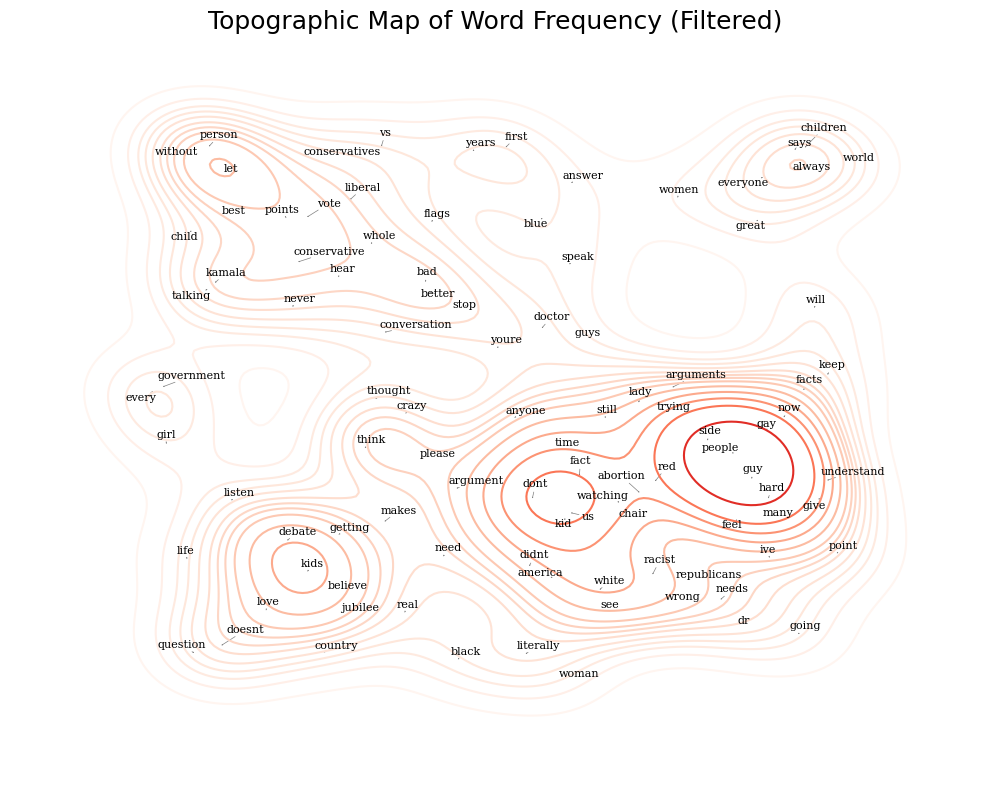

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # Make sure you have installed this library
from adjustText import adjust_text  # Make sure you have installed this library

# Load data
data = pd.read_csv("filtered_top100_words.csv")

# Pick top N words for clarity
top_n = data.sort_values(by='Count', ascending=False).head(100)

# Assign grid positions randomly
top_n['x'] = np.random.uniform(0, 10, size=len(top_n))
top_n['y'] = np.random.uniform(0, 10, size=len(top_n))

# Create contour-like plot using seaborn KDE
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=top_n['x'],
    y=top_n['y'],
    weights=top_n['Count'],
    cmap="Reds",
    fill=False,
    bw_adjust=0.5,
    levels=15,
    thresh=0.05
)

# Annotate words with adjustText to avoid overlaps
texts = []
for i, row in top_n.iterrows():
    texts.append(
        plt.text(row['x'], row['y'], row['Word'],
                 fontsize=8,
                 ha='center',
                 fontfamily='serif')   # You can change 'serif' to any font family you like
        
    )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.title("Topographic Map of Word Frequency (Filtered)", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()



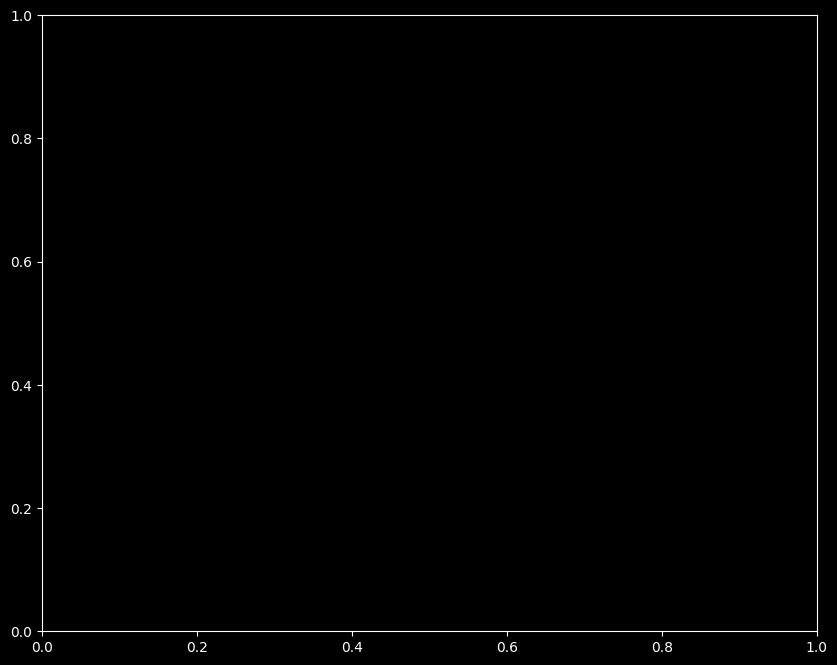

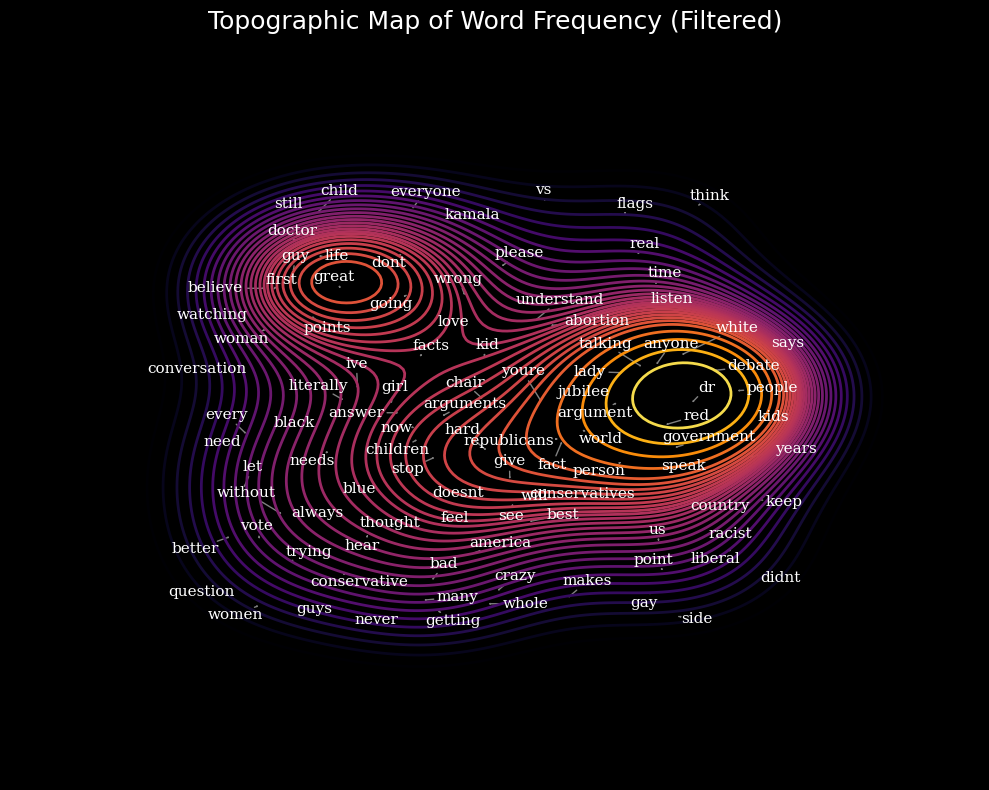

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # Make sure you have installed this library
from adjustText import adjust_text  # Make sure you have installed this library

# Load data
data = pd.read_csv("filtered_top100_words.csv")

# Pick top N words for clarity
top_n = data.sort_values(by='Count', ascending=False).head(100)

# Assign grid positions randomly
top_n['x'] = np.random.uniform(0, 10, size=len(top_n))
top_n['y'] = np.random.uniform(0, 10, size=len(top_n))


plt.style.use('dark_background')  # Enables dark theme
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')  # Background for the full figure
ax.set_facecolor('black') 

# Create contour-like plot using seaborn KDE
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=top_n['x'],
    y=top_n['y'],
    weights=top_n['Count'],
    cmap="inferno",
    fill=False,
    bw_adjust=1,
    levels=30,
    thresh=0.1,
    linewidths=2 
)

# Annotate words with adjustText to avoid overlaps
texts = []
for i, row in top_n.iterrows():
    texts.append(
        plt.text(row['x'], row['y'], row['Word'],
                 fontsize=11,
                 ha='center',
                 fontfamily='serif')   # You can change 'serif' to any font family you like
        
    )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.title("Topographic Map of Word Frequency (Filtered)", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()



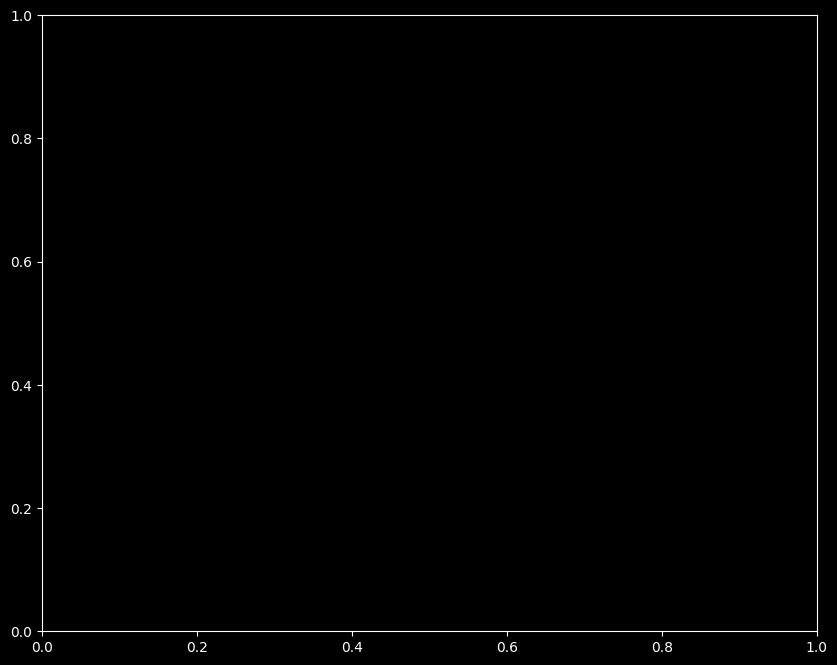

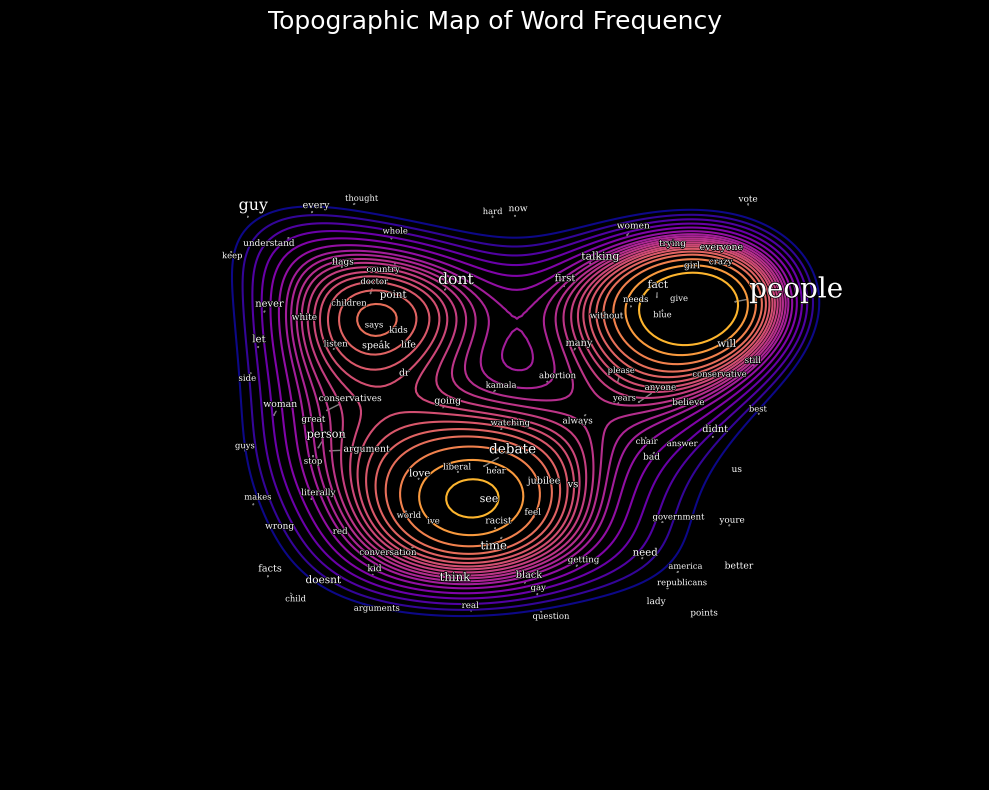

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # Make sure you have installed this library
from adjustText import adjust_text  # Make sure you have installed this library
import matplotlib.patheffects as path_effects



# Load data
data = pd.read_csv("filtered_top100_words.csv")

# Pick top N words for clarity
top_n = data.sort_values(by='Count', ascending=False).head(50)

# Assign grid positions randomly
top_n = data.sort_values(by='Count', ascending=False).head(100)
top_n['x'] = np.random.uniform(0, 10, size=len(top_n))
top_n['y'] = np.random.uniform(0, 10, size=len(top_n))

# Normalize counts to font size
min_font, max_font = 6, 20
count_min, count_max = top_n['Count'].min(), top_n['Count'].max()
def scale_font(count):
    return min_font + (count - count_min) / (count_max - count_min) * (max_font - min_font)

#setup for dark bg
plt.style.use('dark_background')  
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')  
ax.set_facecolor('black') 

# Create contour-like plot using seaborn KDE
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=top_n['x'],
    y=top_n['y'],
    weights=top_n['Count'],
    cmap="plasma",
    fill=False,
    bw_adjust=1,
    levels=20,
    thresh=0.3,
    linewidths=1.5
)


texts = []
for i, row in top_n.iterrows():
    fontsize = scale_font(row['Count'])
    
    txt = plt.text(row['x'], row['y'], row['Word'],
                   fontsize=fontsize,
                   ha='center',
                   color='white',
                   fontfamily='serif')
    
    # Add black outline to text
    txt.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='black'),
        path_effects.Normal()
    ])
    
    texts.append(txt)

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.title("Topographic Map of Word Frequency", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

